## Основы анализа данных

## Домашнее задание 2

### О задании

1) Выберите не менее трех количественных признаков, объясните выбор и примените метод К-средних (для K=5, для K=9). В обоих случаях сделайте порядка 10 случайных инициализаций и выберите то, которое доставляет минимум критерию метода.

2) Проинтерпретируйте оба разбиения с помощью признаков таблицы данных. Объясните, какое из разбиений лучше с точки зрения интерпретации.

3) Для одного из полученных разбиений:

Сравните средние по какому-либо признаку в двух кластерах, используя бутстрэп.

Найдите 95% доверительный интервал для среднего значения какого-либо признака на всем множестве объектов, используя бутстрэп.

Для одного из кластеров сравните среднее на всем множестве для какого-либо признака с его средним внутри кластера, используя бутстрэп.

Примечание: каждое применение бутстрэпа должно быть обоими методами, с опорой и без.

В качестве рассматриваемых для применения метода K-средних на наш взгляд лучше всего подходят те признаки, которые связаны с пространственным расположением объектов. В данных, которые мы исследуем, есть широта и долгота аварий. По нашему предположению, применив метод для широты и долготы, мы можем получить разбиение на города.

Загрузим данные об авариях:

In [75]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
"""
p1 = pandas.read_csv('../../data/acc1.csv')
p2 = pandas.read_csv('../../data/acc2.csv').query('Longitude>-0.125').query('Latitude<51.470')
p3 = pandas.read_csv('../../data/acc3.csv')
p4 = pandas.read_csv('../../data/Accidents0515.csv').sample(1500)
practice_data = pandas.concat((p1, p2, p3, p4))
"""
practice_data = pandas.read_csv('../../data/full_data.csv')
practice_data.head()

,Unnamed: 0,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Index,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Unnamed: 0.1,Urban_or_Rural_Area,Weather_Conditions
0,0,3,3218,-1,0,200501BS00001,2,0,04/01/2005,3,...,1,1,2,6,0,30,17:42,NaN,1,2
1,1,4,450,5,0,200501BS00002,3,0,05/01/2005,4,...,5,1,1,3,0,30,17:36,NaN,1,1
2,2,5,0,-1,0,200501BS00003,3,0,06/01/2005,5,...,0,1,1,6,0,30,00:15,NaN,1,1
3,3,3,3220,-1,0,200501BS00004,3,0,07/01/2005,6,...,0,1,1,6,0,30,10:35,NaN,1,1
4,4,6,0,-1,0,200501BS00005,3,0,10/01/2005,2,...,0,1,2,6,0,30,21:13,NaN,1,1


В приведенной выше таблице нас интересуют две колонки: Longitude, Latitude. Давайте визуализируем их.


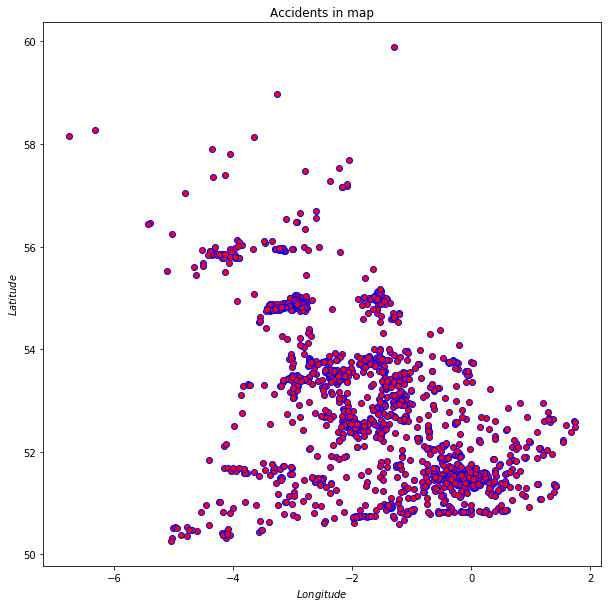

In [96]:
def draw_long_lat_plot():
    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )

    ax1.scatter(x=practice_data["Longitude"], y=practice_data["Latitude"], c='r', edgecolor='b', alpha=1)
    ax1.set_title('Accidents in map')
    ax1.set_xlabel('$Longitude$')
    ax1.set_ylabel('$Latitude$')
draw_long_lat_plot()

Уже отчетливо видны большие города, например Лондон (внизу справа). Мы решили добавить еще один признак - ограничение скорости. Логично, что в городах оно будет меньше, чем на магистралях вне их. Вот, что получилось:

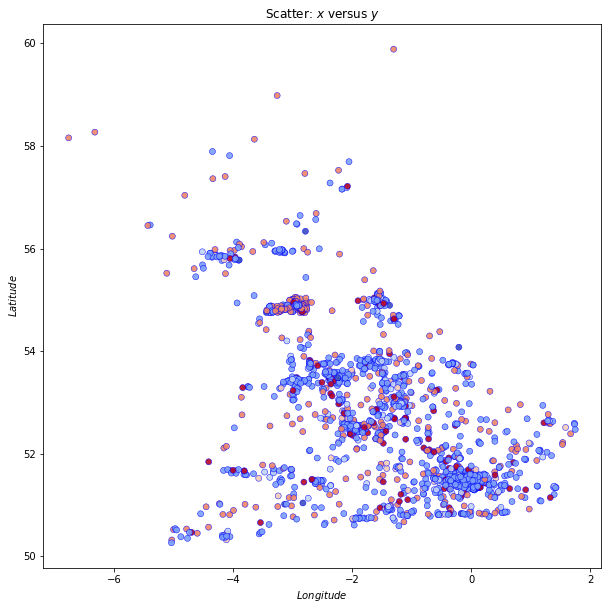

In [128]:
def draw_long_lat_speed_plot():
    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )

    ax1.scatter(x=practice_data["Longitude"], y=practice_data["Latitude"],
                c=practice_data["Speed_limit"],edgecolor='b', cmap='coolwarm', alpha=0.9, linewidths=0.5)
    ax1.set_title('Scatter: $x$ versus $y$')
    ax1.set_xlabel('$Longitude$')
    ax1.set_ylabel('$Latitude$')
draw_long_lat_speed_plot()

Города стали еще более отчетливыми. Теперь можно пробовать применить метод K средних, чтобы обозначить границы этих городов.